<a href="https://colab.research.google.com/github/quimHM/QHM_TFG_repository/blob/main/TFG_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt
import seaborn as sns

In [188]:
def create_df(x,xcol,y,ycol):
  auxnparray = x.copy()
  newdf = pd.DataFrame(auxnparray, columns = xcol)
  newdf[ycol] = y.tolist()
  return newdf

In [189]:
def L_unbiased_f(D,B):
  if (D > 500):
    return 1
  else:
    return 0

def populate_unbiased_ds(n):
  ds = pd.DataFrame(columns=["D1","B1","L"])
  D1_mu, D1_sigma = 500, 100 # D1 mean and standard deviation
  ds["D1"] = np.random.normal(D1_mu, D1_sigma, 1000)
  ds["B1"] = np.random.binomial(1,0.5,1000)
  for d in range(len(ds)):
    #print(ds.iloc[d])
    ds.loc[d,"L"] = L_unbiased_f(ds.iloc[d]["D1"],ds.iloc[d]["B1"])
  return ds

In [190]:
ds1 = populate_unbiased_ds(1000)

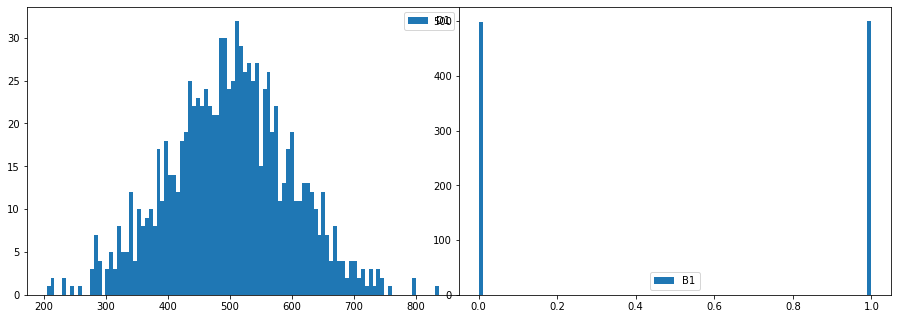

In [191]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(ds1["D1"],bins=100)
ax.legend(labels=['D1'])
ax2 = fig.add_axes([1,0,1,1])
ax2.hist(ds1["B1"],bins=100)
ax2.legend(labels=['B1'])
plt.show()

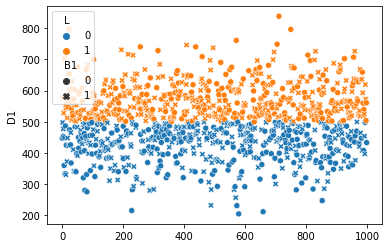

In [192]:
sns.scatterplot(data=ds1,x=range(len(ds1)),y="D1",style="B1", hue="L")

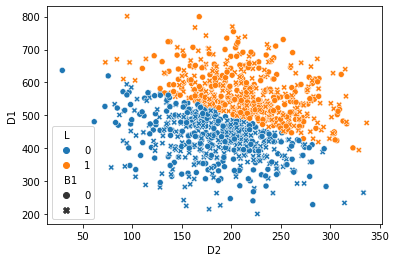

In [193]:
def L_unbiased_f2(D1,D2,B):
  #if (D1 > 500 and D2 > 200):
  if ((D1+D2) > 700):
    return 1
  else:
    return 0

def populate_unbiased_ds2(n):
  ds = pd.DataFrame(columns=["D1","D2","B1","L"])
  D1_mu, D1_sigma = 500, 100 # D1 mean and standard deviation
  ds["D1"] = np.random.normal(D1_mu, D1_sigma, 1000)
  D2_mu, D2_sigma = 200, 50 # D2 mean and standard deviation
  ds["D2"] = np.random.normal(D2_mu, D2_sigma, 1000)
  ds["B1"] = np.random.binomial(1,0.5,1000)
  for d in range(len(ds)):
    #print(ds.iloc[d])
    ds.loc[d,"L"] = L_unbiased_f2(ds.iloc[d]["D1"],ds.iloc[d]["D2"],ds.iloc[d]["B1"])
  return ds

ds2 = populate_unbiased_ds2(1000)
sns.scatterplot(data=ds2,x="D2",y="D1",style="B1", hue="L")

In [194]:
def L_biased_f(D,B):
  if ((D+B*100) > 500):
    return 1
  else:
    return 0

def populate_biased_ds(n):
  ds = pd.DataFrame(columns=["D1","B1","L"])
  D1_mu, D1_sigma = 500, 100 # D1 mean and standard deviation
  ds["D1"] = np.random.normal(D1_mu, D1_sigma, 1000)
  ds["B1"] = np.random.binomial(1,0.5,1000)
  for d in range(len(ds)):
    #print(ds.iloc[d])
    ds.loc[d,"L"] = L_biased_f(ds.iloc[d]["D1"],ds.iloc[d]["B1"])
  return ds

In [195]:
ds3 = populate_biased_ds(1000)

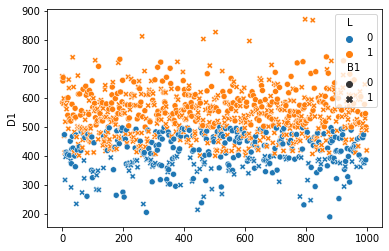

In [196]:
sns.scatterplot(data=ds3,x=range(len(ds3)),y="D1",style="B1", hue="L")

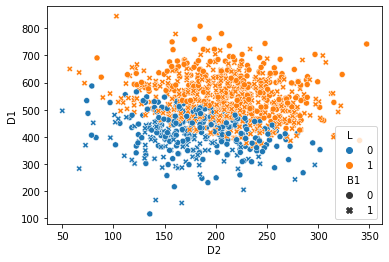

In [197]:
def L_biased_f2(D1,D2,B):
  if (D1+D2+B*100 > 700):
    return 1
  else:
    return 0

def populate_biased_ds2(n):
  ds = pd.DataFrame(columns=["D1","D2","B1","L"])
  D1_mu, D1_sigma = 500, 100 # D1 mean and standard deviation
  ds["D1"] = np.random.normal(D1_mu, D1_sigma, 1000)
  D2_mu, D2_sigma = 200, 50 # D2 mean and standard deviation
  ds["D2"] = np.random.normal(D2_mu, D2_sigma, 1000)
  ds["B1"] = np.random.binomial(1,0.5,1000)
  for d in range(len(ds)):
    #print(ds.iloc[d])
    ds.loc[d,"L"] = L_biased_f2(ds.iloc[d]["D1"],ds.iloc[d]["D2"],ds.iloc[d]["B1"])
  return ds

ds4 = populate_biased_ds2(1000)
sns.scatterplot(data=ds4,x="D2",y="D1",style="B1", hue="L")

In [198]:
X4 = ds4[["D1","D2","B1"]]
y4 = ds4["L"].astype("int")
model1 = LogisticRegression()
model1.fit(X4,y4)

LogisticRegression()

In [199]:
more_ds4 = populate_biased_ds2(1000)
model1.score(more_ds4[["D1","D2","B1"]],more_ds4["L"].astype("int"))

0.979

In [200]:
def show_subgroups(ds):
  subgroups_B = [ds.loc[ds["B1"]==0],ds.loc[ds["B1"]==1]]
  subgroups_L = [ds.loc[ds["L"]==0],ds.loc[ds["L"]==1]]

  subgroups = []
  for b in (0,1):
    subgroups.append(ds.loc[(ds["B1"]==b)])
  subgroups_app = []
  subgroups_dec = []
  percent = []
  for s in subgroups:
    subgroups_app.append(len(s[s["L"]==1]))
    subgroups_dec.append(len(s[s["L"]==0]))
    percent.append(round(100*subgroups_app[-1]/len(s),2))
  print(sum(subgroups_app)/len(ds))
  print(percent)

  yes_contribution = [round(s / sum(subgroups_app),3) for s in subgroups_app]
  instance_contribution = [round(len(s) / len(ds),3) for s in subgroups]
  print("contribution to total approvals:",yes_contribution)
  print("contribution to total amount   :",instance_contribution)
  plot_contribution = pd.DataFrame({'Yes_contribution': yes_contribution,
                    'Instance_contribution': instance_contribution})
  ax = plot_contribution.plot.bar(rot=0)

0.993
0.6584117647058824
[51.26, 80.3]
contribution to total approvals: [0.388, 0.612]
contribution to total amount   : [0.498, 0.502]
0.8401960784313726
0.6617128712871287
[52.0, 80.27]
contribution to total approvals: [0.392, 0.608]
contribution to total amount   : [0.499, 0.501]
0.8384950495049505
0.6614569536423841
[51.95, 80.34]
contribution to total approvals: [0.393, 0.607]
contribution to total amount   : [0.5, 0.5]
0.8384701986754967
0.6615373134328358
[52.06, 80.29]
contribution to total approvals: [0.394, 0.606]
contribution to total amount   : [0.501, 0.499]
0.839044776119403
0.6615697211155378
[52.17, 80.21]
contribution to total approvals: [0.395, 0.605]
contribution to total amount   : [0.501, 0.499]
0.8388326693227092


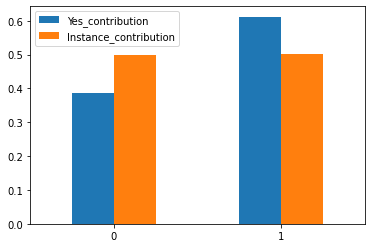

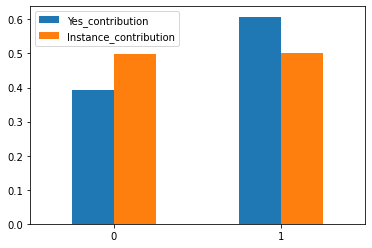

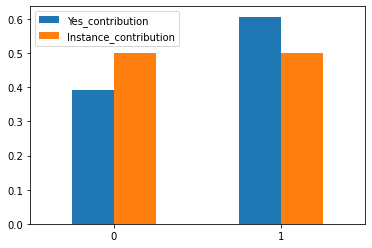

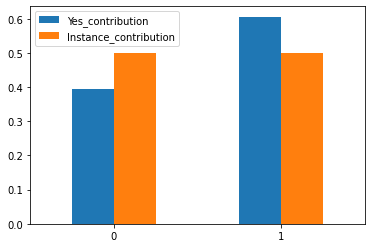

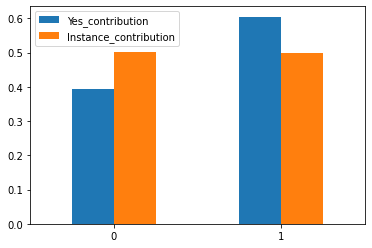

In [204]:
percent_mat = []
data_init = populate_biased_ds2(1000)
X_cummulative = data_init[["D1","D2","B1"]].values
y_cummulative = data_init["L"].astype("int")
y_cummulative_real = data_init["L"].astype("int")
cumm = LogisticRegression()
cumm.fit(X_cummulative,y_cummulative)
print(cumm.score(X_cummulative,y_cummulative_real))

for x in range(250):
  i=x+1
  data_new = populate_unbiased_ds2(1000)
  X_new = data_new[["D1","D2","B1"]].values
  X_cummulative = np.concatenate((X_cummulative, X_new))
  y_cummulative = np.concatenate((y_cummulative, cumm.predict(X_new)))
  y_cummulative_real = np.concatenate((y_cummulative_real, data_new["L"].astype("int")))
  cumm.fit(X_cummulative,y_cummulative)

  if(i%50==0):
    #print(len(y_cummulative[y_cummulative==1])/len(y_cummulative))
    auxds = create_df(X_cummulative,["D1","D2","B1"],y_cummulative,"L")
    show_subgroups(auxds)
    print(cumm.score(X_cummulative,y_cummulative_real))

In [ ]:
print(cumm.score(X_cummulative,y_cummulative_real.astype("int")))